# 8: Resonant Collinearity

For each antenna, create a vector pointing from that antenna to each otehr antena, then flip it over and creata antinote there

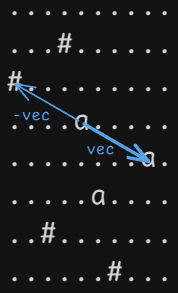

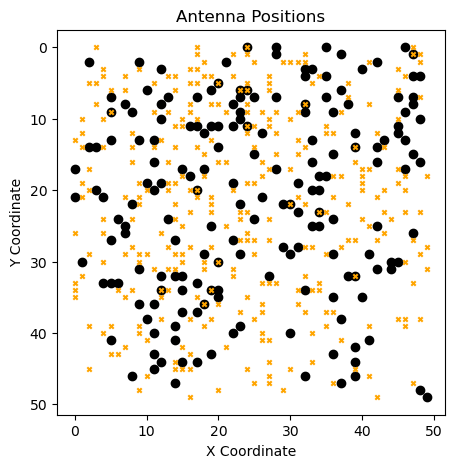

Part 1:  301


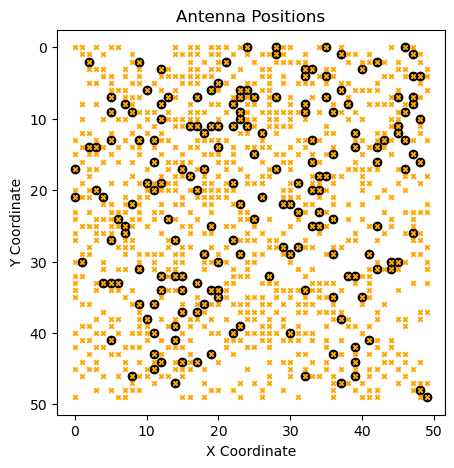

Part 2:  1019


In [26]:
import matplotlib.pyplot as plt
import numpy as np

def Plot(antennas, antinodes):
    plt.figure(figsize=(5, 5))
    for key, points in antennas.items():
        x_coords, y_coords = zip(*points)
        plt.scatter(x_coords, y_coords, color ="black", label=f'Antenna {key}')
    for point in antinodes:
        plt.scatter(point[0], point[1], marker='x', color='orange', s=10, label='Antinode')
        
    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')
    plt.title('Antenna Positions')
    plt.gca().invert_yaxis()
    plt.show()

with open("input.txt", "r") as file:
    data = [[cell for cell in line if cell != "\n"] for line in file.readlines()]


antennas = {}
for y, line in enumerate(data):
    for x, cell in enumerate(line):
        if cell == ".":
            continue
        if cell not in antennas:
                antennas[cell] = []
        antennas[cell].append(np.array([x, y]))

Antinodes = []
for key, antenas in antennas.items():
    for i in range(len(antenas)):
        for j in range(len(antenas)):
            # Get vector to each antenna
            if i == j:
                continue
            
            vec = antenas[i] - antenas[j]
            Antinodes.append(antenas[i] + vec)

Antinodes = np.unique([tuple(antinode) for antinode in Antinodes if 0 <= antinode[0] < len(data[0]) and 0 <= antinode[1] < len(data)], axis=0)
Plot(antennas, Antinodes)

print("Part 1: ", len(Antinodes))

Antinodes = []
for key, antenas in antennas.items():
    for i in range(len(antenas)):
        for j in range(len(antenas)):
            # Get vector to each antenna
            if i == j:
                continue
            
            vec = antenas[i] - antenas[j]
            
            x = 0
            while True:
                antinode_pos = antenas[i] + vec * x
                if not (0 <= antinode_pos[0] < len(data[0]) and 0 <= antinode_pos[1] < len(data)):
                    break
                x += 1
                Antinodes.append(antinode_pos)

                
            
Antinodes = np.unique([tuple(antinode) for antinode in Antinodes if 0 <= antinode[0] < len(data[0]) and 0 <= antinode[1] < len(data)], axis=0)
Plot(antennas, Antinodes)

print("Part 2: ", len(Antinodes))
